In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('./column_2C_weka.csv')

In [3]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


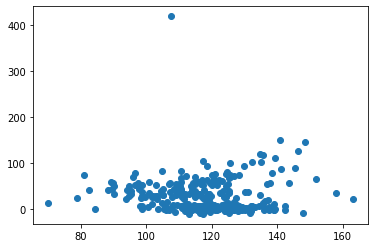

In [4]:
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'])

In [6]:
data2 = data.loc[:,['degree_spondylolisthesis', 'pelvic_radius']]

In [7]:
from sklearn.cluster import KMeans

In [15]:
kmeans = KMeans(n_clusters=2) # 两簇
kmeans.fit(data2)

KMeans(n_clusters=2)

In [16]:
labels = kmeans.predict(data2)

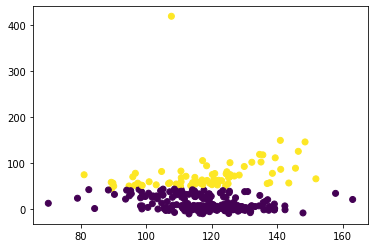

In [17]:
plt.scatter(data['pelvic_radius'], data['degree_spondylolisthesis'], c=labels)

In [14]:
from sklearn.preprocessing import StandardScaler # (原始数据 -均值) / 标准差 均值0  方差1
# Standardizaton

In [19]:
# 效果评估
# 数据 3组 -> 交叉表 
df = pd.DataFrame({'labels':labels, 'class':data['class']})
ct = pd.crosstab(df['labels'], df['class'])

In [20]:
ct

class,Abnormal,Normal
labels,,
0,138,100
1,72,0


D:\ruanjian\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


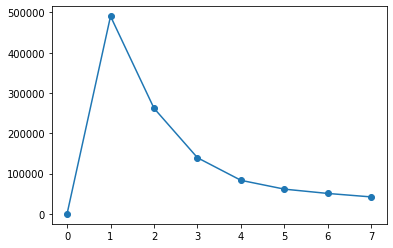

In [21]:
inertia_list = np.empty(8)
for i in range(1, 8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(data2)
    # inertia_ 越低  簇越多: 点到 簇的质心的距离之和
    inertia_list[i] = kmeans.inertia_
plt.plot(range(0, 8), inertia_list, '-o')

In [22]:
# 标准化  监督学习 无监督学习
data = pd.read_csv('./column_2C_weka.csv')

In [23]:
data3 = data.drop('class', axis=1)

In [25]:
scalar = StandardScaler()
kmeans = KMeans(n_clusters=2)
pipe = make_pipeline(scalar, kmeans)
pipe.fit(data3)
labels = pipe.predict(data3)
df = pd.DataFrame({'labels':labels, 'class':data['class']})
ct = pd.crosstab(df['labels'], df['class'])

In [26]:
ct

class,Abnormal,Normal
labels,,
0,116,10
1,94,90


In [24]:
from sklearn.pipeline import make_pipeline

### 层次聚类:
    1. 计算不同类别数据点间的相似度来创建一颗 有层次的嵌套聚类树

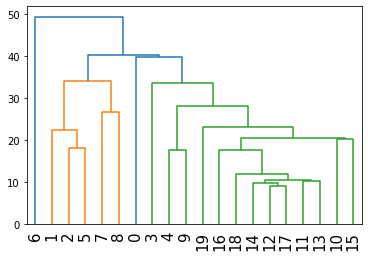

In [28]:
from scipy.cluster.hierarchy import linkage, dendrogram
# linkage 层次聚类
merg = linkage(data3.iloc[200:220, :], method='single')
# dendrogram 绘制树图
dendrogram(merg, leaf_rotation=90, leaf_font_size=15)
plt.show()

In [29]:
from scipy.io import loadmat

In [31]:
def find_closest_centroids(X, centroids):
    m = X.shape[0]
    k = centroids.shape[0]
    idx = np.zeros(m)
    
    for i in range(m):
        min_dist = 1000000
        for j in range(k):
            dist = np.sum((X[i,:] - centroids[j, :]) ** 2)
            if dist < min_dist:
                min_dist = dist
                idx[i] = j
    return idx

In [32]:
data = loadmat('./ex7data2.mat')

In [33]:
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Wed Nov 16 00:48:22 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ 1.84207953,  4.6075716 ],
        [ 5.65858312,  4.79996405],
        [ 6.35257892,  3.2908545 ],
        [ 2.90401653,  4.61220411],
        [ 3.23197916,  4.93989405],
        [ 1.24792268,  4.93267846],
        [ 1.97619886,  4.43489674],
        [ 2.23454135,  5.05547168],
        [ 2.98340757,  4.84046406],
        [ 2.97970391,  4.80671081],
        [ 2.11496411,  5.37373587],
        [ 2.12169543,  5.20854212],
        [ 1.5143529 ,  4.77003303],
        [ 2.16979227,  5.27435354],
        [ 0.41852373,  4.88312522],
        [ 2.47053695,  4.80418944],
        [ 4.06069132,  4.99503862],
        [ 3.00708934,  4.67897758],
        [ 0.66632346,  4.87187949],
        [ 3.1621865 ,  4.83658301],
        [ 0.51155258,  4.91052923],
        [ 3.1342801 ,  4.96178114],
        [ 2.04974595,  5.6241395 ],
        [ 0.66582785,  5.243

In [53]:
X = data['X']
# initial_centroids = initial_centroids = np.array([[3, 3], [6, 2], [8, 5]])
idx = find_closest_centroids(X, init_cen)
idx

array([0., 2., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2.

In [35]:
# 计算簇的聚类中心  聚类中心只是当前分配给簇的所有样本的平均值
data2 = pd.DataFrame(data.get('X'), columns=['X1', 'X2'])

In [36]:
data2

,X1,X2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


In [37]:
import seaborn as sns

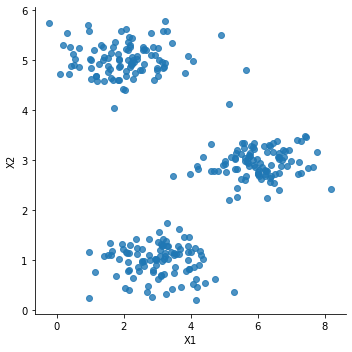

In [38]:
sns.lmplot('X1', 'X2', data=data2, fit_reg=False)

In [54]:
def compute_centroids(X, idx, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    
    for i in range(k):
        indices = np.where(idx == i)
        centroids[i, :] = (np.sum(X[indices, :], axis=1) / len(indices[0])).ravel()
    return centroids

In [55]:
compute_centroids(X, idx, 3)

array([[1.8916712 , 5.02822013],
       [3.07829097, 1.06986716],
       [6.02383359, 3.06113274]])

In [46]:
# 只需要再将样本分配给最近的簇并重新计算簇的聚类中心
def run_k_means(X, initial_centroids, max_iters):
    m, n = X.shape
    k = initial_centroids.shape[0]
    idx = np.zeros(m)
    centroids = initial_centroids
    
    for i in range(max_iters):
        idx = find_closest_centroids(X, centroids)
        centroids = compute_centroids(X, idx, k)
    return idx, centroids

In [56]:
idx, centroids = run_k_means(X, init_cen, 10)

In [57]:
cluster1 = X[np.where(idx == 0)[0], :]
cluster2 = X[np.where(idx == 1)[0], :]
cluster3 = X[np.where(idx == 2)[0], :]

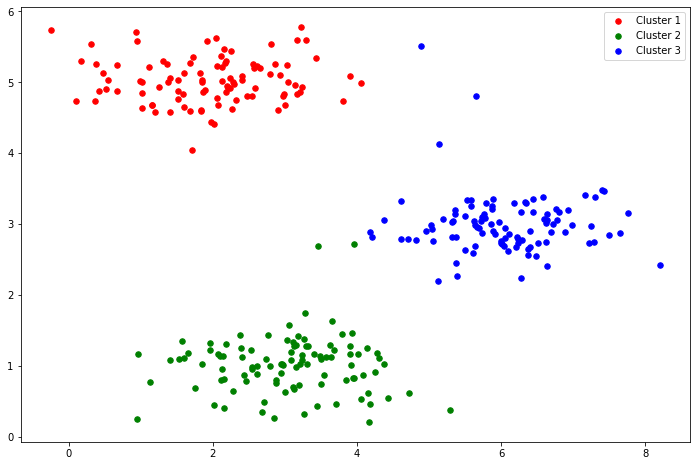

In [59]:
fig, ax = plt.subplots(figsize=(12, 8))
ax.scatter(cluster1[:, 0], cluster1[:, 1], s=30, color='r', label='Cluster 1')
ax.scatter(cluster2[:, 0], cluster2[:, 1], s=30, color='g', label='Cluster 2')
ax.scatter(cluster3[:, 0], cluster3[:, 1], s=30, color='b', label='Cluster 3')
ax.legend()
plt.show()

In [50]:
def init_centroids(X, k):
    m, n = X.shape
    centroids = np.zeros((k, n))
    idx = np.random.randint(0, m, k)
    
    for i in range(k):
        centroids[i, :] = X[idx[i], :]
    return centroids

In [52]:
init_cen = init_centroids(X, 3)

In [61]:
# 通过聚类找到代表性的少数颜色  聚类分配将原始24位颜色映射到低维颜色空间
from IPython.display import Image

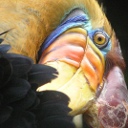

In [62]:
Image(filename='./bird_small.png')

In [63]:
image_data = loadmat('./bird_small.mat')

In [64]:
image_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Tue Jun  5 04:06:24 2012',
 '__version__': '1.0',
 '__globals__': [],
 'A': array([[[219, 180, 103],
         [230, 185, 116],
         [226, 186, 110],
         ...,
         [ 14,  15,  13],
         [ 13,  15,  12],
         [ 12,  14,  12]],
 
        [[230, 193, 119],
         [224, 192, 120],
         [226, 192, 124],
         ...,
         [ 16,  16,  13],
         [ 14,  15,  10],
         [ 11,  14,   9]],
 
        [[228, 191, 123],
         [228, 191, 121],
         [220, 185, 118],
         ...,
         [ 14,  16,  13],
         [ 13,  13,  11],
         [ 11,  15,  10]],
 
        ...,
 
        [[ 15,  18,  16],
         [ 18,  21,  18],
         [ 18,  19,  16],
         ...,
         [ 81,  45,  45],
         [ 70,  43,  35],
         [ 72,  51,  43]],
 
        [[ 16,  17,  17],
         [ 17,  18,  19],
         [ 20,  19,  20],
         ...,
         [ 80,  38,  40],
         [ 68,  39,  40],
     

In [65]:
A = image_data['A']

In [66]:
A.shape

(128, 128, 3)

In [67]:
A = A / 255 # 获取 正常值

In [69]:
A.shape

(128, 128, 3)

In [70]:
X = np.reshape(A, (A.shape[0] * A.shape[1], A.shape[2]))

In [72]:
X.shape

(16384, 3)

In [73]:
# 随机初始化质心
initial_centroids = init_centroids(X, 16)

In [76]:
idx, centroids = run_k_means(X, initial_centroids, 10)  # 运行算法

In [77]:
# 找到最近质心
idx = find_closest_centroids(X, centroids)

# 将每个像素映射到 质心
X_recovered = centroids[idx.astype(int), :]

In [78]:
X_recovered.shape

(16384, 3)

In [79]:
X_recovered = np.reshape(X_recovered, (A.shape[0], A.shape[1], A.shape[2]))

In [81]:
X_recovered.shape

(128, 128, 3)

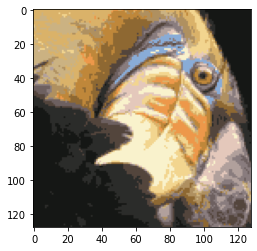

In [82]:
plt.imshow(X_recovered)
plt.show()

In [83]:
from skimage import io

D:\ruanjian\anaconda\lib\site-packages\skimage\io\_plugins\matplotlib_plugin.py:150: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


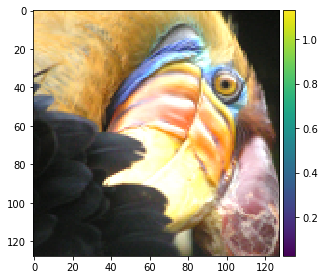

In [127]:
pic = io.imread('./bird_small.png') / 225.
io.imshow(pic)
plt.show()

In [128]:
data = pic.reshape(128*128, 3)

In [129]:
data.shape

(16384, 3)

In [130]:
from sklearn.cluster import KMeans

In [131]:
model = KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [132]:
help(KMeans)

Help on class KMeans in module sklearn.cluster._kmeans:

class KMeans(sklearn.base.TransformerMixin, sklearn.base.ClusterMixin, sklearn.base.BaseEstimator)
 |  KMeans(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='deprecated', verbose=0, random_state=None, copy_x=True, n_jobs='deprecated', algorithm='auto')
 |  
 |  K-Means clustering.
 |  
 |  Read more in the :ref:`User Guide <k_means>`.
 |  
 |  Parameters
 |  ----------
 |  
 |  n_clusters : int, default=8
 |      The number of clusters to form as well as the number of
 |      centroids to generate.
 |  
 |  init : {'k-means++', 'random'}, callable or array-like of shape             (n_clusters, n_features), default='k-means++'
 |      Method for initialization:
 |  
 |      'k-means++' : selects initial cluster centers for k-mean
 |      clustering in a smart way to speed up convergence. See section
 |      Notes in k_init for more details.
 |  
 |      'random': choose `n_clusters` o

In [133]:
model.fit(data)

D:\ruanjian\anaconda\lib\site-packages\sklearn\cluster\_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


KMeans(n_clusters=16, n_init=100, n_jobs=-1)

In [134]:
centroids = model.cluster_centers_

In [135]:
centroids

array([[1.10723491, 1.07228412, 0.92689193],
       [0.33061291, 0.30057699, 0.30094311],
       [1.04093617, 0.64843499, 0.28674232],
       [0.09697283, 0.10498084, 0.09345621],
       [0.66701702, 0.56921421, 0.50918919],
       [0.79520496, 0.71405609, 0.63805825],
       [0.98549708, 0.81387826, 0.51771664],
       [0.19310978, 0.19230339, 0.18256021],
       [0.52478081, 0.44190791, 0.40120761],
       [0.43900327, 0.51928105, 0.73346405],
       [1.09220331, 0.97414303, 0.71614726],
       [0.86036797, 0.68959605, 0.38865659],
       [0.93836938, 0.84604178, 0.83567388],
       [0.64551111, 0.81752889, 0.98428444],
       [0.7392026 , 0.5368229 , 0.24043495],
       [0.52459281, 0.37595872, 0.20415417]])

In [136]:
c = model.predict(data)

In [137]:
c.shape

(16384,)

In [138]:
centroids.shape

(16, 3)

In [139]:
centroids[c].shape

(16384, 3)

In [140]:
commpressed = centroids[c].reshape((128, 128, 3))

In [141]:
pic

array([[[0.97333333, 0.8       , 0.45777778],
        [1.02222222, 0.82222222, 0.51555556],
        [1.00444444, 0.82666667, 0.48888889],
        ...,
        [0.06222222, 0.06666667, 0.05777778],
        [0.05777778, 0.06666667, 0.05333333],
        [0.05333333, 0.06222222, 0.05333333]],

       [[1.02222222, 0.85777778, 0.52888889],
        [0.99555556, 0.85333333, 0.53333333],
        [1.00444444, 0.85333333, 0.55111111],
        ...,
        [0.07111111, 0.07111111, 0.05777778],
        [0.06222222, 0.06666667, 0.04444444],
        [0.04888889, 0.06222222, 0.04      ]],

       [[1.01333333, 0.84888889, 0.54666667],
        [1.01333333, 0.84888889, 0.53777778],
        [0.97777778, 0.82222222, 0.52444444],
        ...,
        [0.06222222, 0.07111111, 0.05777778],
        [0.05777778, 0.05777778, 0.04888889],
        [0.04888889, 0.06666667, 0.04444444]],

       ...,

       [[0.06666667, 0.08      , 0.07111111],
        [0.08      , 0.09333333, 0.08      ],
        [0.08      , 0

In [142]:
commpressed

array([[[0.98549708, 0.81387826, 0.51771664],
        [0.98549708, 0.81387826, 0.51771664],
        [0.98549708, 0.81387826, 0.51771664],
        ...,
        [0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0.10498084, 0.09345621]],

       [[0.98549708, 0.81387826, 0.51771664],
        [0.98549708, 0.81387826, 0.51771664],
        [0.98549708, 0.81387826, 0.51771664],
        ...,
        [0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0.10498084, 0.09345621]],

       [[0.98549708, 0.81387826, 0.51771664],
        [0.98549708, 0.81387826, 0.51771664],
        [0.98549708, 0.81387826, 0.51771664],
        ...,
        [0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0.10498084, 0.09345621]],

       ...,

       [[0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0.10498084, 0.09345621],
        [0.09697283, 0

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


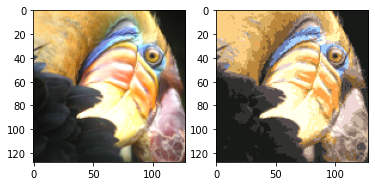

In [143]:
fig, ax = plt.subplots(1, 2)
ax[0].imshow(pic)
ax[1].imshow(commpressed)
plt.show()

### 高维度数据降维
    T-SNE

In [144]:
from sklearn.manifold import TSNE

In [153]:
model = TSNE(learning_rate=100)  # 正常 50 - 200
transformed = model.fit_transform(data2)

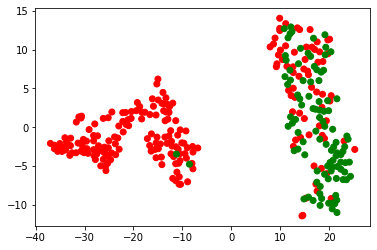

In [154]:
x = transformed[:, 0]
y = transformed[:, 1]
plt.scatter(x, y, c=color_list)

In [148]:
data

array([[0.97333333, 0.8       , 0.45777778],
       [1.02222222, 0.82222222, 0.51555556],
       [1.00444444, 0.82666667, 0.48888889],
       ...,
       [0.28888889, 0.19111111, 0.17333333],
       [0.25777778, 0.16444444, 0.16888889],
       [0.23111111, 0.17333333, 0.15111111]])

In [151]:
data = pd.read_csv('./column_2C_weka.csv')
color_list = ['red' if i == 'Abnormal' else 'green' for i in data.loc[:, 'class']]

In [152]:
data2 = data.loc[:, ['pelvic_radius', 'degree_spondylolisthesis']]

In [150]:
data

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal
...,...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,Normal


### PCA
     1. 去相关
      旋转要与轴对齐的数据样本
      平移数据样本 使其均值为零
      没有信息丢失
      fit():学习如何移动样本
      transform() 转换
     2. 得到的PCA特征不是线性相关的
     3. 主成分:方差方向

In [160]:
from sklearn.decomposition import PCA
model = PCA()
a = model.fit(data3)

In [161]:
transformed = a.transform(data3)
model.components_

array([[ 3.23645647e-01,  1.13192291e-01,  3.03674740e-01,
         2.10453357e-01, -2.99598300e-02,  8.63153779e-01],
       [-4.76634849e-01, -9.85632787e-02, -5.32783979e-01,
        -3.78071570e-01,  3.21809199e-01,  4.82438036e-01],
       [-1.54481282e-03, -2.64657410e-01, -4.96541893e-01,
         2.63112598e-01, -7.74612852e-01,  1.18940778e-01],
       [ 3.73677251e-01,  7.54113757e-01, -3.39411757e-01,
        -3.80436506e-01, -1.75106042e-01, -3.29143086e-02],
       [-4.41703869e-01,  7.35414748e-02,  5.12024113e-01,
        -5.15245344e-01, -5.14639730e-01,  8.35992525e-02],
       [ 5.77350269e-01, -5.77350269e-01, -1.08930072e-11,
        -5.77350269e-01, -3.59059872e-12,  3.06729795e-12]])

In [165]:
# PCA方差
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)
pipeline.fit(data3)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

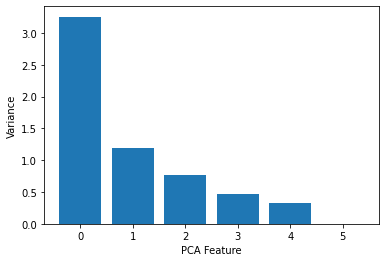

In [167]:
plt.bar(range(pca.n_components_), pca.explained_variance_)
plt.xlabel('PCA Feature')
plt.ylabel('Variance')
plt.show()

In [168]:
data3
# 固有维度 = 方差显著的PCA特征个数

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501
...,...,...,...,...,...,...
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750


In [169]:
def pca(X):
    X = (X - X.mean()) / X.std()
    
    # 计算协方差矩阵
    X = np.matrix(X)
    cov = (X.T * X) / X.shape[0]
    
    U, S, V = np.linalg.svd(cov)
    return U, S, V

In [171]:
U, S, V = pca(data3) # 在确保数据被归一化之后  输出 原始数据的协方差均值的奇异值分解

In [175]:
U # 主成分 

matrix([[-5.35141704e-01, -2.19368199e-03,  9.60691033e-02,
         -1.02798971e-01,  4.23458331e-01, -7.17289820e-01],
        [-3.23584608e-01,  5.27545439e-01,  6.48700760e-01,
         -6.44118277e-03,  1.50562387e-01,  4.16492034e-01],
        [-4.57969569e-01,  9.28751348e-02, -1.52338410e-01,
         -5.48099706e-01, -6.76770127e-01,  1.45680911e-11],
        [-4.45905809e-01, -3.96157338e-01, -3.60312716e-01,
         -1.27200929e-01,  4.31500108e-01,  5.58596187e-01],
        [ 1.43496674e-01,  7.27755634e-01, -5.85990593e-01,
         -1.74212977e-01,  2.75763131e-01,  3.44671589e-12],
        [-4.23977530e-01,  1.62776864e-01, -2.71184129e-01,
          8.01528139e-01, -2.78852214e-01, -8.30350457e-12]])

In [176]:
def project_data(X, U, K):
    U_reduced = U[:, :K]
    return np.dot(X, U_reduced)


In [180]:
Z = project_data(data3, U, 1)

In [179]:
data3.shape

(310, 6)

In [181]:
Z

matrix([[ -62.94729921],
        [ -34.06067911],
        [ -71.04510224],
        [ -75.39693021],
        [ -48.39394792],
        [ -31.53500644],
        [ -52.73853569],
        [ -35.13578767],
        [ -48.55263174],
        [ -42.78271276],
        [ -42.61089872],
        [ -18.55629691],
        [ -50.26783662],
        [ -52.27633008],
        [ -60.4637003 ],
        [ -42.9634045 ],
        [ -68.73776238],
        [ -28.23482475],
        [ -33.44996933],
        [ -35.97811169],
        [ -42.12292807],
        [ -53.69227163],
        [ -75.04093979],
        [ -37.91041096],
        [ -27.98066592],
        [ -49.25806094],
        [  -8.50231038],
        [ -50.3928153 ],
        [ -38.47707904],
        [ -68.00093478],
        [ -55.95821629],
        [ -47.40746475],
        [ -40.10552926],
        [ -37.88201205],
        [ -59.37672666],
        [ -26.57979878],
        [ -30.85351277],
        [ -22.28010237],
        [ -56.59464607],
        [ -49.52155434],


In [173]:
S

array([3.23531102e+00, 1.19072909e+00, 7.58635384e-01, 4.71003697e-01,
       3.24965970e-01, 2.63656303e-16])

In [174]:
V

matrix([[-5.35141704e-01, -3.23584608e-01, -4.57969569e-01,
         -4.45905809e-01,  1.43496674e-01, -4.23977530e-01],
        [-2.19368199e-03,  5.27545439e-01,  9.28751348e-02,
         -3.96157338e-01,  7.27755634e-01,  1.62776864e-01],
        [ 9.60691033e-02,  6.48700760e-01, -1.52338410e-01,
         -3.60312716e-01, -5.85990593e-01, -2.71184129e-01],
        [-1.02798971e-01, -6.44118277e-03, -5.48099706e-01,
         -1.27200929e-01, -1.74212977e-01,  8.01528139e-01],
        [ 4.23458331e-01,  1.50562387e-01, -6.76770127e-01,
          4.31500108e-01,  2.75763131e-01, -2.78852214e-01],
        [-7.17289820e-01,  4.16492034e-01,  1.45680949e-11,
          5.58596187e-01,  3.44652727e-12, -8.30339696e-12]])

In [182]:
def recover_data(Z, U, K):
    U_reduced = U[:, :K]
    return np.dot(Z, U_reduced.T)

In [184]:
recover_data(Z, U, 1)

matrix([[ 33.68572496,  20.36877714,  28.8279475 ,  28.06856639,
          -9.03272808,  26.68824042],
        [ 18.22728986,  11.0215115 ,  15.59875454,  15.18785468,
          -4.88759417,  14.44096259],
        [ 38.01919707,  22.98910157,  32.53649486,  31.6794238 ,
         -10.19473589,  30.12152694],
        ...,
        [ 31.82442656,  19.24330419,  27.23506468,  26.51764303,
          -8.53362639,  25.21358671],
        [ 24.32524257,  14.70876597,  20.8173289 ,  20.2689622 ,
          -6.52274226,  19.27219683],
        [ 16.8515925 ,  10.18966736,  14.42144482,  14.04155746,
          -4.51870497,  13.35103675]])